

# Exploratory Analysis of Global Air Pollution Dataset (WHO)

" Internationally, the importance of Clean Air has recently been recognized and legislated for. On 28 July, the UN General Assembly adopted a resolution which declared access to a clean, healthy, and sustainable environment to be a universal human right.

Good air quality is essential for our health as particles in the air can damage our lungs, hearts, and brains and cause a host of other health problems."

#### In this project, I explored the World Health Organization's Global Pollution Dataset (2021). I looked at:
- Where and when the data were collected
- The timeline development of the concentration of the different pollutants
- Distribution of measurement concentrations
- Correlations between the concentration of the different pollutants
- Regional concentrations and regional time-line development of the pollutants
- The 10 cities which had the highest average concentrations of the different pollutants


#### Dataset:
Data downloaded from WHO (https://www.who.int/data/gho/data/themes/air-pollution/who-air-quality-database)

The WHO Ambient Air Quality Database compiles data on ground measurements of annual mean concentrations of nitrogen dioxide (NO2), particulate matter of a diameter equal to or smaller than 10 μm (PM10) or equal or smaller than 2.5 μm (PM2.5) which aim at representing an average for the city or town as a whole, rather than for individual stations. Both groups of pollutants originate mainly from human activities related to fossil fuel combustion.

#### Pollutants in the dataset:
Particulate matter (PM2.5 and PM10) PM is a common proxy indicator for air pollution. There is strong evidence for the negative health impacts associated with exposure to this pollutant. The major components of PM are sulfates, nitrates, ammonia, sodium chloride, black carbon, mineral dust and water.

Nitrogen dioxide (NO2) NO2 is a gas that is commonly released from the combustion of fuels in the transportation and industrial sectors.

#### Temporal Coverage:
The temporal coverage represents the number of days per year covered by measurements or any alternative qualification as provided in the original sources. If data from several monitoring stations in one city were available, their average temporal coverage was used for the city average.

# Importing libraries and preparing dataset

In [1]:
#Importing libraries

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extra settings:
# Setting the default size of visualisations
sns.set(rc={'figure.figsize': (3.54,3.54)})
sns.set
# Ignore red warnings
pd.options.mode.chained_assignment = None

#Show more columns of dataframe
pd.set_option('display.max_columns', 100)

%matplotlib inline

# Custom color map
cmap = ['#377eb8','#ff7f00', '#4daf4a', '#e41a1c', '#984ea3', '#999999']

# Set style
sns.set_style('white')

In [3]:
# Import data
data = pd.read_excel(r"C:\Users\Tori\OneDrive\Documents\WHO_air_pollution_data.xlsx")

In [4]:
# Read data
data.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN


In [5]:
#Check datatypes for columns
print(data.dtypes)

WHO Region                                 object
ISO3                                       object
WHO Country Name                           object
City or Locality                           object
Measurement Year                            int64
PM2.5 (μg/m3)                             float64
PM10 (μg/m3)                              float64
NO2 (μg/m3)                               float64
PM25 temporal coverage (%)                float64
PM10 temporal coverage (%)                float64
NO2 temporal coverage (%)                 float64
Reference                                  object
Number and type of monitoring stations     object
Version of the database                     int64
Status                                    float64
dtype: object


In [6]:
# Change data types of columns
data['Measurement Year'] = data['Measurement Year'].astype(int)
data['Version of the database'] = data['Version of the database'].astype(int)

In [7]:
# Overview of data set
data.describe()

,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Version of the database,Status
count,32191.000000,15048.000000,21109.000000,22200.000000,7275.000000,5381.000000,19890.000000,32191.000000,0.0
mean,2015.579354,22.920320,30.533252,20.619336,90.794096,90.583500,93.696804,2021.744214,NaN
std,2.752654,17.925906,29.312756,12.133388,14.872681,13.816311,10.451751,1.051897,NaN
min,2000.000000,0.010000,1.040000,0.000000,0.000000,2.568493,1.923077,2016.000000,NaN
25%,2014.000000,10.350000,16.980000,12.000000,88.595890,87.945205,93.207763,2022.000000,NaN
50%,2016.000000,16.000000,22.000000,18.800000,97.000000,96.039000,96.369863,2022.000000,NaN
75%,2018.000000,31.000000,31.300000,27.160000,99.000000,98.938000,98.926941,2022.000000,NaN
max,2021.000000,191.900000,540.000000,210.680000,100.000000,100.000000,100.000000,2022.000000,NaN


In [8]:
# Find duplicates
print("Number of duplicated rows:",data.duplicated(keep=False).sum())

Number of duplicated rows: 0


In [9]:
# Find missing values pr column (NaN)
nan_per_column = data.isna().sum().sort_values(ascending = False)
print(nan_per_column)


Status                                    32191
PM10 temporal coverage (%)                26810
PM25 temporal coverage (%)                24916
Number and type of monitoring stations    23433
PM2.5 (μg/m3)                             17143
NO2 temporal coverage (%)                 12301
PM10 (μg/m3)                              11082
NO2 (μg/m3)                                9991
Reference                                     5
WHO Region                                    1
ISO3                                          0
WHO Country Name                              0
City or Locality                              0
Measurement Year                              0
Version of the database                       0
dtype: int64


In [10]:
# Number of non-NaN values in each column
non_nan_per_column = data.count().sort_values(ascending = False)
print(non_nan_per_column)

ISO3                                      32191
WHO Country Name                          32191
City or Locality                          32191
Measurement Year                          32191
Version of the database                   32191
WHO Region                                32190
Reference                                 32186
NO2 (μg/m3)                               22200
PM10 (μg/m3)                              21109
NO2 temporal coverage (%)                 19890
PM2.5 (μg/m3)                             15048
Number and type of monitoring stations     8758
PM25 temporal coverage (%)                 7275
PM10 temporal coverage (%)                 5381
Status                                        0
dtype: int64


In [11]:
#Shape of table
data.shape

(32191, 15)

In [12]:
#See coloumn names
data.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

In [13]:
# Rename Columns 
data = data.rename(columns = {'WHO Region': 'Region', 'WHO Country Name': 'Country', 'City or Locality': 'City/Locality',
       'Measurement Year': 'Measurement_Year', 'PM2.5 (μg/m3)': 'PM2.5(μg/m3)', 'PM10 (μg/m3)': 'PM10(μg/m3)', 'NO2 (μg/m3)': 'NO2(μg/m3)',
       'PM25 temporal coverage (%)': 'PM25_temp._cov.(%)', 'PM10 temporal coverage(%)':'PM10_temp._cov.(%)',
       'NO2 temporal coverage (%)':  'NO2_temp._cov.(%)'})

In [14]:
data['Region'].value_counts() #Number of rows of data per region

European Region                 20292
Western Pacific Region           4798
Region of the Americas           3957
South East Asia Region           2514
Eastern Mediterranean Region      438
African Region                    191
Name: Region, dtype: int64

In [15]:
# Rename Regions
data['Region'] = data['Region'].replace({'European Region': 'Europe', 'Western Pacific Region': 'West Pacific ', 'Region of the Americas' : 'America',
                                       'South East Asia Region': 'South East Asia', 'Eastern Mediterranean Region': 'East Mediterranian', 'African Region': 'Africa' })

In [16]:
# Subset dataset (remove columns I am not working with)
data = data[['Region', 
             #'ISO3', 
             'Country', 'City/Locality', 'Measurement_Year',
       'PM2.5(μg/m3)', 'PM10(μg/m3)', 'NO2(μg/m3)', 'PM25_temp._cov.(%)',
       'PM10 temporal coverage (%)', 'NO2_temp._cov.(%)', 'Reference',
       #'Number and type of monitoring stations', 'Version of the database',
       #'Status'
            ]].copy()


# Exploratory Analysis

### Number of measurements and references

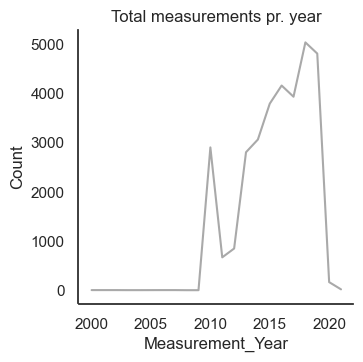

In [17]:
#Find number of total measurements pr. year
Total_assesment_years = data['Measurement_Year'].value_counts().reset_index()
fig = sns.lineplot(data= Total_assesment_years, x='index', y='Measurement_Year', color = 'darkgray')
fig.set(xlabel='Measurement_Year', ylabel='Count')
fig.set(title = "Total measurements pr. year")

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1)


plt.show()

We can see that most of the data were collected after 2010, with a deep decline in 2020. (The year of 2020 is also the year Covid-19 shut down much of the world.) 

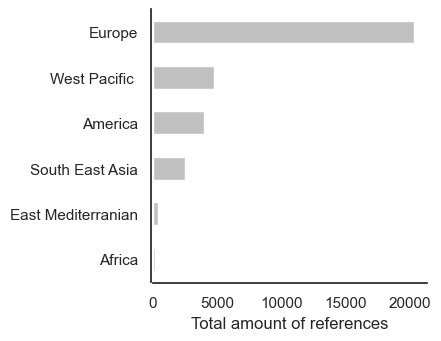

In [18]:
# Find number of measurements pr. region

data_regions = data['Region'].value_counts().sort_values(ascending = True)

# Plot:
ax = data_regions.plot(kind = 'barh', color = 'silver')
ax.set_xlabel('Total amount of references')

sns.despine(offset=1)

plt.show()

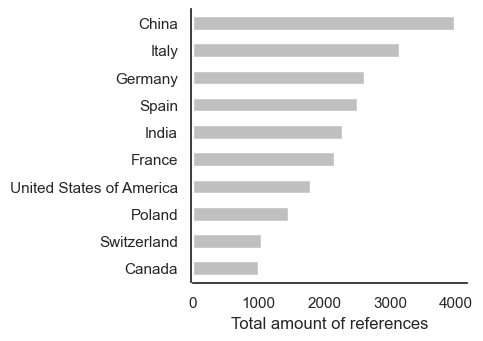

In [19]:
# Find top 10 countries in number of measurements and plot
ax = top_10_countries = data['Country'].value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh', color = 'silver')
ax.set_xlabel('Total amount of references')

sns.despine(offset=1)


plt.show()

We can observe that most of the measurements are collected from Europe. Of individual countries, China has the highest amout of measurements in the dataset. 

### Measurement values: Yearly global levels of pollutants and overall distribution of pollutants and temporal coverage. 

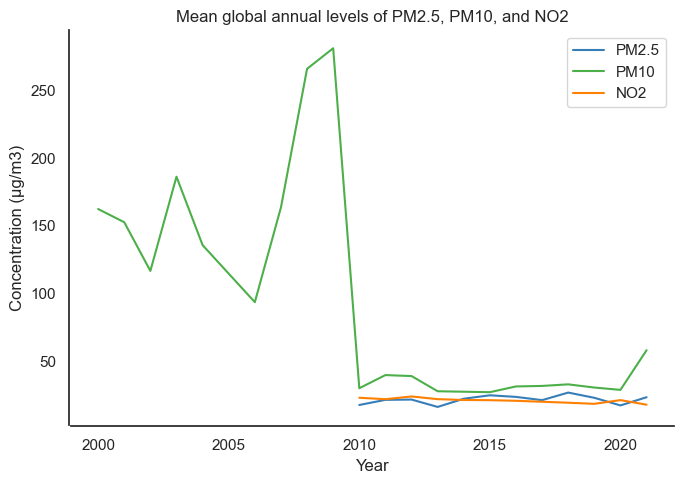

In [20]:
# Find average annual levels of pollutants
pollution_trends = data.groupby('Measurement_Year')[['PM2.5(μg/m3)', 'PM10(μg/m3)', 'NO2(μg/m3)']].mean()

# Plot
fig, ax = plt.subplots(figsize=(7, 5))

# Plot each pollutant
ax.plot(pollution_trends['PM2.5(μg/m3)'], color=cmap[0], label='PM2.5')
ax.plot(pollution_trends['PM10(μg/m3)'], color=cmap[2], label='PM10')
ax.plot(pollution_trends['NO2(μg/m3)'], color=cmap[1], label='NO2')

#  Custom:
ax.set_title('Mean global annual levels of PM2.5, PM10, and NO2')
ax.set_xlabel('Year')
ax.set_ylabel('Concentration (μg/m3)')

sns.despine(offset=1)
ax.legend()
plt.tight_layout()

plt.show()


As seen in the figure, data prior to the year 2010 are missing for PM2.5 and NO2. The levels of PM10 reached a climax in the year 2010, then drastically dropped and stabilised before again increasing from the year 2020-2021. The average levels of PM2.5 and NO2 are without drastic changes, and stable. Regardles shutdowns in the world due to Covid-19, the mean consentration-levels of PM10 and PM2.5 increased, whereof the consentrations for PM10  reached the highest level in ten years. 

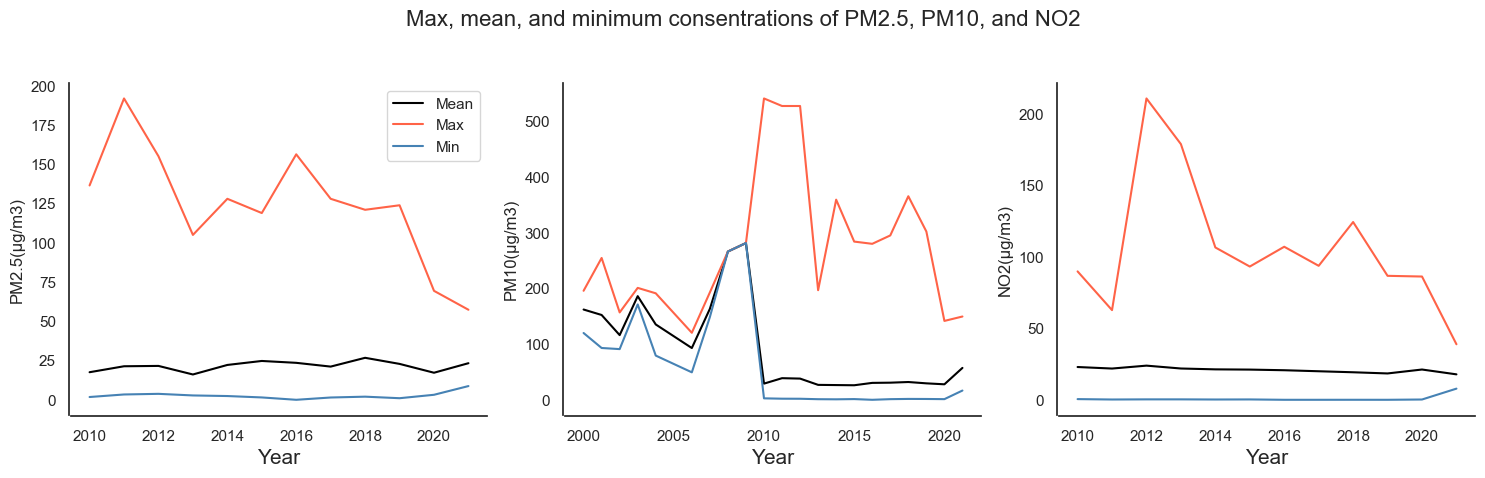

In [21]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

# Plot the mean and max values of PM2.5 over time
ax1 = sns.lineplot(x= 'Measurement_Year' , y='PM2.5(μg/m3)', data=data, ax=axs[0], estimator=np.mean, color = 'black', errorbar=None,  legend = True)  
ax1 = sns.lineplot(x='Measurement_Year' , y='PM2.5(μg/m3)', data=data, ax=axs[0], estimator=np.max, color = 'tomato' ,errorbar=None,  legend = False)
ax1 = sns.lineplot(x='Measurement_Year' , y='PM2.5(μg/m3)', data=data, ax=axs[0], estimator=np.min, color = 'steelblue', errorbar=None,  legend = False)



# Plot the mean and max values of PM10 over time
ax2 = sns.lineplot(x= 'Measurement_Year' , y='PM10(μg/m3)', data=data, ax=axs[1], estimator=np.mean, color = 'black', errorbar=None,  legend = True)  
ax2 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', data=data, ax=axs[1], estimator=np.max, color = 'tomato', errorbar=None,  legend = False)
ax2 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', data=data, ax=axs[1], estimator=np.min, color = 'steelblue', errorbar=None,  legend = False)


# Plot the mean and max values of NO2 over time
ax3 = sns.lineplot(x= 'Measurement_Year' , y='NO2(μg/m3)', data=data, ax=axs[2], estimator=np.mean, color = 'black', errorbar=None,  legend = True)  
ax3 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', data=data, ax=axs[2], estimator=np.max, color = 'tomato' ,errorbar=None,  legend = False)
ax3 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', data=data, ax=axs[2], estimator=np.min, color = 'steelblue', errorbar=None,  legend = False)

# Custom:
ax1.set_xlabel('Year', fontsize = 15)
ax2.set_xlabel('Year', fontsize = 15)
ax3.set_xlabel('Year', fontsize = 15)

legend_labels = { 'Mean': '#1f77b4', 'Max': '#ff7f0e', 'Min': '#2ca02c'}
ax1.legend(legend_labels)


plt.suptitle('Max, mean, and minimum consentrations of PM2.5, PM10, and NO2', fontsize=16)

# Adjust layout 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

sns.despine(offset=1)

plt.show()

We can observe that the maximum measured concentration varies greatly for all pollutants and that there seems to be an overall decrease in maximum measurement values. The average levels (mean) and the minimum levels are somewhat stable, except for PM10 prior to the year of 2010.   

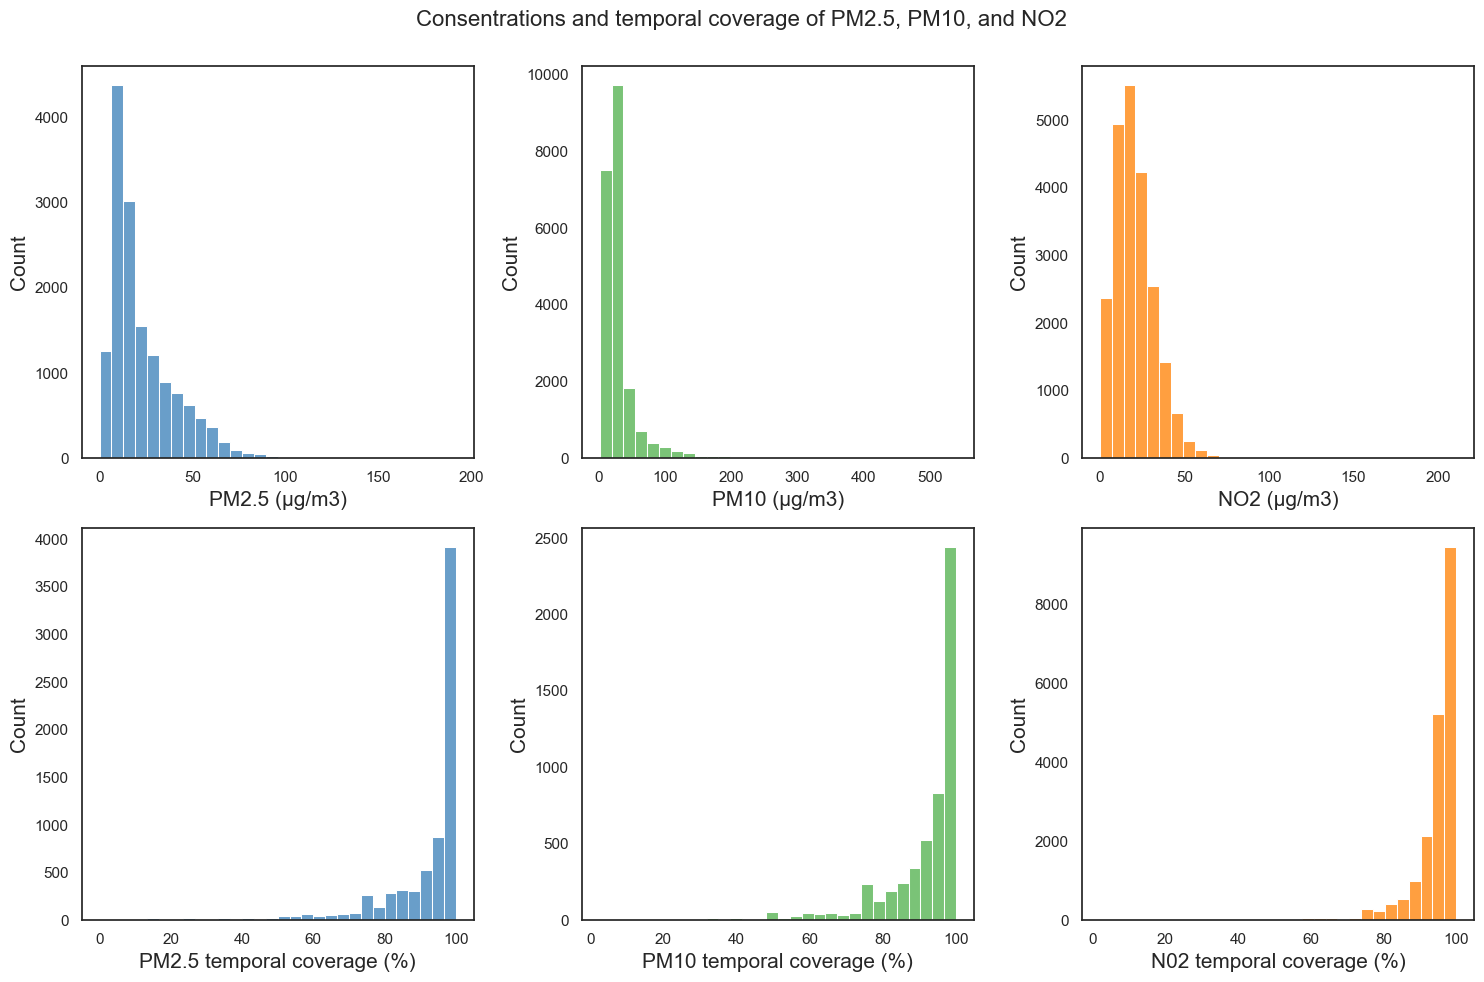

In [22]:
# Create subplots with histograms of concentrations and temporal coverage of pollutants
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

ax1 = sns.histplot(data=data['PM2.5(μg/m3)'], bins = 30, ax=axs[0,0], color=cmap[0])
ax2 = sns.histplot(data = data['PM10(μg/m3)'], bins = 30, ax=axs[0,1], color =cmap[2])
ax3 = sns.histplot(data = data['NO2(μg/m3)'], bins = 30, ax=axs[0,2], color = cmap[1])
ax4 = sns.histplot(data = data['PM25_temp._cov.(%)'], bins = 30, ax=axs[1,0], color = cmap[0])
ax5 = sns.histplot(data = data['PM10 temporal coverage (%)'], bins = 30, ax=axs[1,1], color = cmap[2])
ax6 = sns.histplot(data = data['NO2_temp._cov.(%)'], bins = 30, ax=axs[1,2], color = cmap[1])


plt.tight_layout()

# Custom:
ax1.set_xlabel('PM2.5 (μg/m3)', fontsize = 15)
ax1.set_ylabel('Count', fontsize = 15)
ax2.set_xlabel('PM10 (μg/m3)', fontsize = 15)
ax2.set_ylabel('Count', fontsize = 15)
ax3.set_xlabel('NO2 (μg/m3)', fontsize = 15)
ax3.set_ylabel('Count', fontsize = 15)
ax4.set_xlabel('PM2.5 temporal coverage (%)', fontsize = 15)
ax4.set_ylabel('Count', fontsize = 15)
ax5.set_xlabel('PM10 temporal coverage (%)', fontsize = 15)
ax5.set_ylabel('Count', fontsize = 15)
ax6.set_xlabel('N02 temporal coverage (%)', fontsize = 15)
ax6.set_ylabel('Count', fontsize = 15)


plt.suptitle('Consentrations and temporal coverage of PM2.5, PM10, and NO2', fontsize=16, x = 0.5)

# Adjust 
plt.tight_layout(rect=[0, 0, 1, 0.98])


plt.show()

The concentration values for pollutants are right skewed, with fewer values on the higher concentrations. This is especially prominent for PM10 and PM2.5.
Temporal coverage levels of all the pollutions are relatively high for the dataset.                                 

### Correlations in dataset

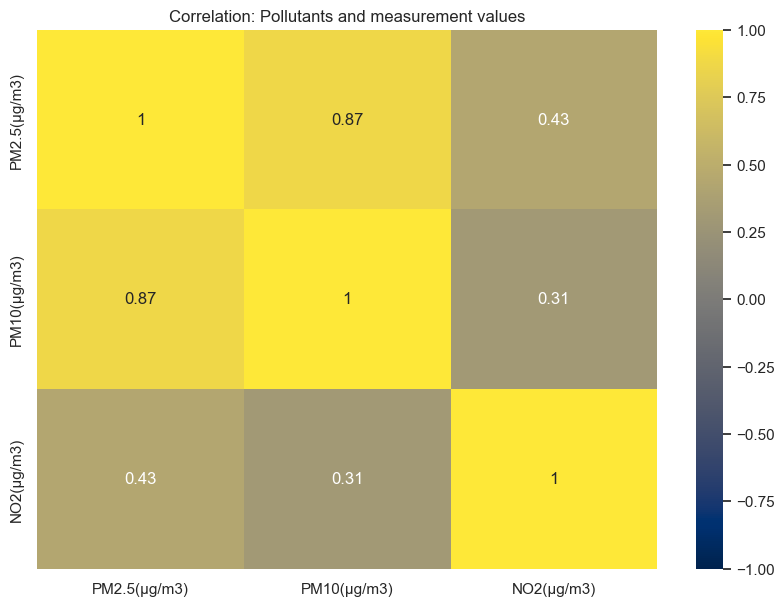

In [23]:
plt.figure(figsize=(10,7))
# Create df including pollutant consentrations
new_num = data[['PM2.5(μg/m3)', 'PM10(μg/m3)', 'NO2(μg/m3)']]


# Find correlations and create heatmap
heat =new_num.corr()
ax = sns.heatmap(heat, vmin=-1.0, vmax=1.0, annot = True, cmap ='cividis')
ax.set_title('Correlation: Pollutants and measurement values')

plt.show()


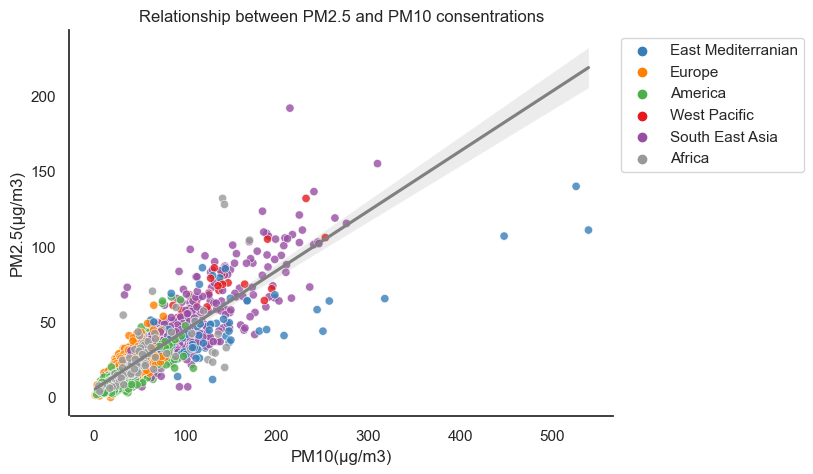

In [30]:
# Plotting a scatterplot with regression-line to show the relationship between PM2.5 and PM10 consentrations
plt.figure(figsize=(7,5))
ax = sns.scatterplot(data=data, x="PM10(μg/m3)", y="PM2.5(μg/m3)", hue="Region", alpha=0.8, palette =cmap)
sns.regplot(data=data, x="PM10(μg/m3)", y="PM2.5(μg/m3)", scatter=False, ax=ax, color='gray')

# Custom:
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=True, fontsize=11)
ax.set_title('Relationship between PM2.5 and PM10 concentrations')


# Despine
sns.despine(offset=1, trim=False)


plt.show()


We can observe a relatively strong positive correlation (0.85) between concentration levels of PM2.5 and PM10, indicating the two pollutants come from similar sources. The correlation in concentrations seems to differ some between the regions, indicating some independence in the creation/release of the two pollutants according to the region

## Regional Consentrations

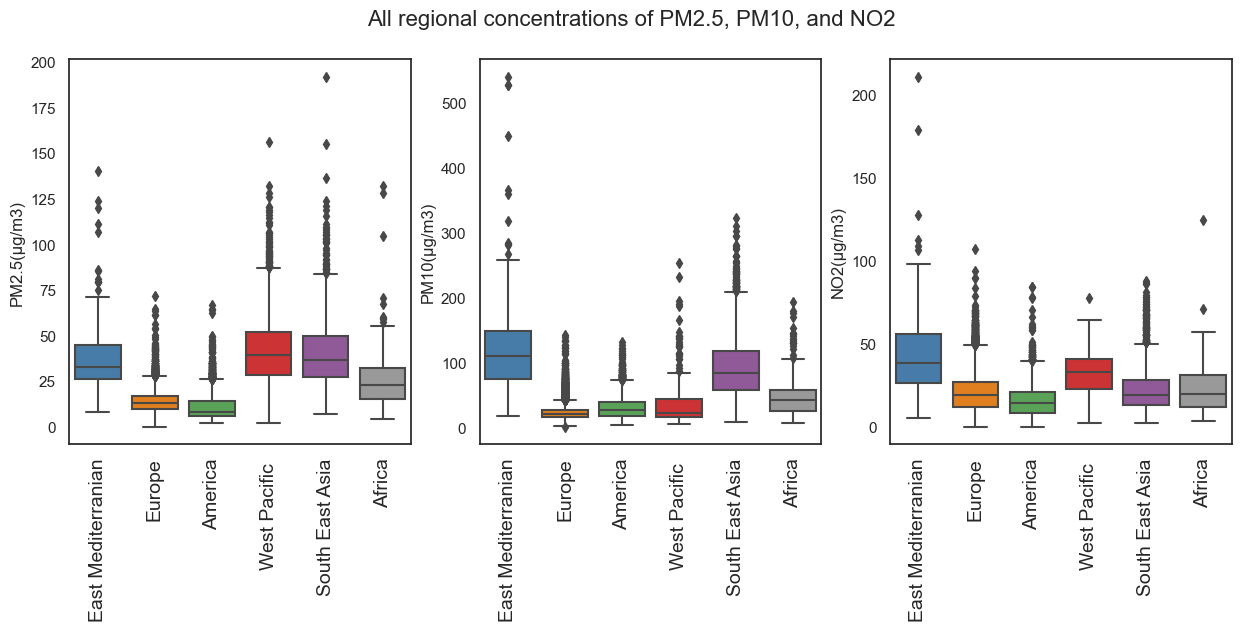

In [25]:
# Create subplots with boxplots showing regional consentrations of pollutants
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

ax1 = sns.boxplot(x='Region', y='PM2.5(μg/m3)', data=data, ax=axs[0], palette = cmap)
ax2 = sns.boxplot(x='Region', y='PM10(μg/m3)', data=data, ax=axs[1],  palette = cmap)
ax3 = sns.boxplot(x='Region',y='NO2(μg/m3)', data=data, ax=axs[2],  palette = cmap)


# Rotate all tick labels and adjust size:
for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)
# Remove x labels
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')



plt.suptitle('All regional concentrations of PM2.5, PM10, and NO2', fontsize=16, x=0.5)

# Adjust layout to fit subplots and titles
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.show()

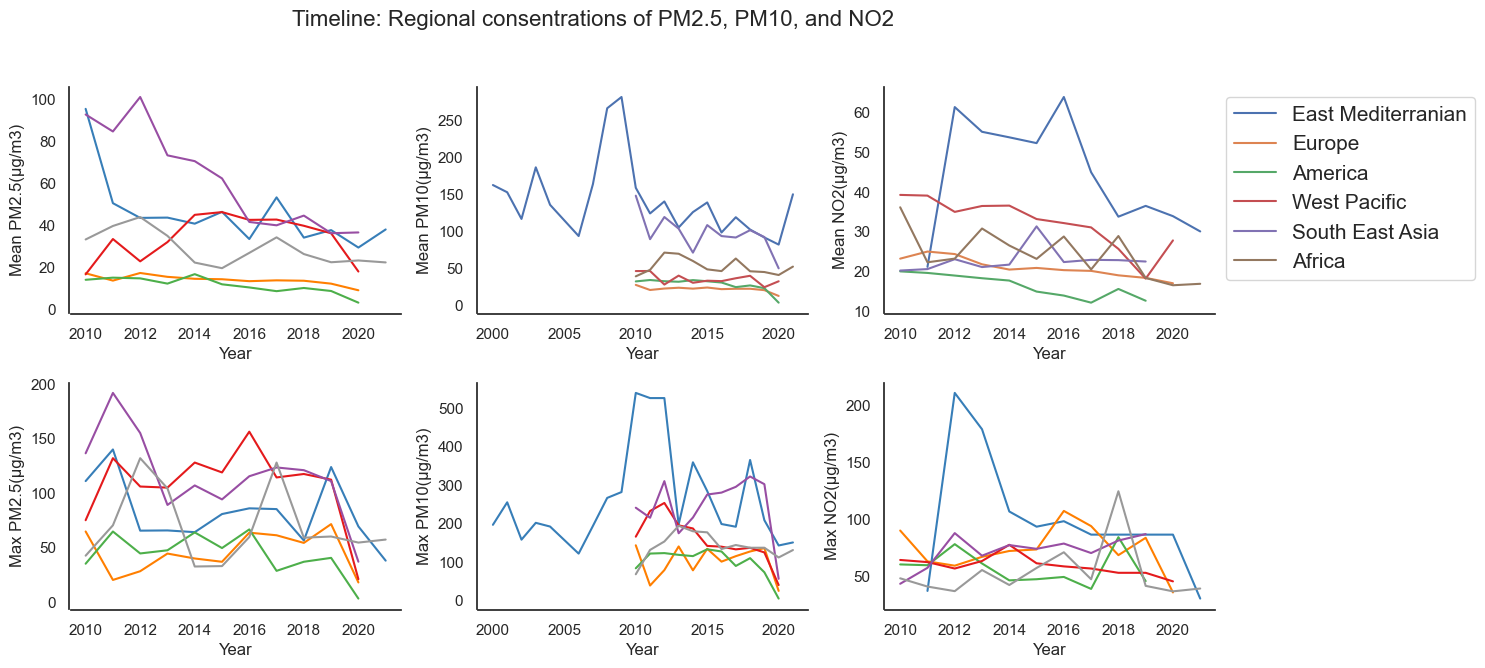

In [31]:
# Create a figure with subplots of timelines(lineplots)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 7))

# Plot the mean and max values of PM2.5, PM10, and NO2 for each region over time
ax1 = sns.lineplot(x= 'Measurement_Year', y='PM2.5(μg/m3)', hue = 'Region', data=data, ax=axs[0,0],  palette = cmap, estimator=np.mean, errorbar=None,  legend = False)  
ax2 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', hue = 'Region', data=data, ax=axs[0,1], estimator=np.mean, errorbar=None,  legend = False)
ax3 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', hue = 'Region', data=data, ax=axs[0,2], estimator=np.mean, errorbar=None,  legend = True)

ax4 = sns.lineplot(x= 'Measurement_Year', y='PM2.5(μg/m3)', hue = 'Region', data=data, ax=axs[1,0],  palette = cmap, estimator=np.max,errorbar=None, legend = False) 
ax5 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', hue = 'Region', data=data, ax=axs[1,1],  palette = cmap, estimator=np.max, errorbar=None, legend = False)
ax6 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', hue = 'Region', data=data, ax=axs[1,2],  palette = cmap, estimator=np.max, errorbar=None, legend = False)

# Set labels on axes
ax1.set_ylabel('Mean PM2.5(μg/m3)', fontsize = 12)
ax2.set_ylabel('Mean PM10(μg/m3)', fontsize = 12)
ax3.set_ylabel('Mean NO2(μg/m3)', fontsize = 12)
ax4.set_ylabel('Max PM2.5(μg/m3)', fontsize = 12)
ax5.set_ylabel('Max PM10(μg/m3)', fontsize = 12)
ax6.set_ylabel('Max NO2(μg/m3)', fontsize = 12)

ax1.set_xlabel('Year', fontsize = 12)
ax2.set_xlabel('Year', fontsize = 12)
ax3.set_xlabel('Year', fontsize = 12)
ax4.set_xlabel('Year', fontsize = 12)
ax5.set_xlabel('Year', fontsize = 12)
ax6.set_xlabel('Year', fontsize = 12)

# Custom:
ax3.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon = True, fontsize =15)

plt.suptitle('Timeline: Regional concentrations of PM2.5, PM10, and NO2', fontsize=16, x = 0.4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

sns.despine(offset=1) 
#plt.tight_layout()


plt.show()


East Mediterranian and Asia(South East and West Pacific) have the highest concentrations of air pollution, followed by Africa.  South East Asia has the overall highest values for PM2.5, but the level of the pollutant has been declining in the region to a similar level as to of East Mediterranian and West Pacific. East Mediterranean have the highest levels of PM10, followed by South East Asia. East Mediterranian also have the highest levels of NO2. The values have been fluctuating throughout the years, but there seems to be an overall decrease in air pollutants for all regions, however, this will have to be further investigated. Around the year 2020, most of the measurements decreased for all regions. This is most likely due to COVID-19 and a sudden decrease in transportation etc. However, we do not observe the same effect for the mean values for PM2.5 and PM10 in East Mediterranean and Africa, and for NO2 in the West Pacific. This could be due to such as fewer COVID-related restrictions in these regions.  

# Most polluted cities (2015-2021)

In [27]:
# Subsetting the data in new dataframe in order to see latest trends (2016-)

after2014 = (data['Measurement_Year'] >= 2015)

data1= data.loc[after2014]

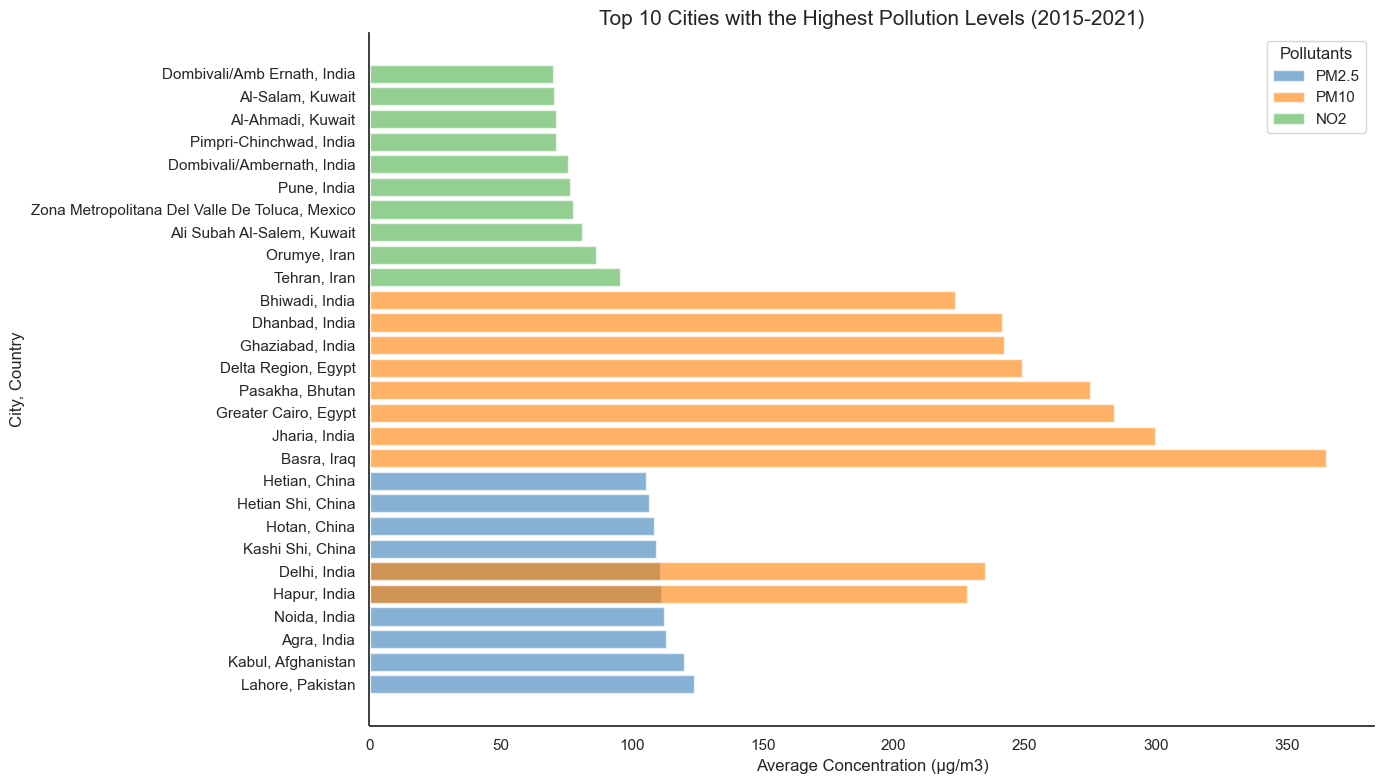

In [28]:
# Modify the name for Iran and include it in the city-country labels
data1['Country'] = data1['Country'].replace('Iran (Islamic Republic of)', 'Iran')
#Show both city and country
data1['City_Country'] = data1['City/Locality'] + ", " + data1['Country']

# Calculate the average pollution levels for the top 10 cities
top_cities_pm25 = data1.groupby('City_Country')['PM2.5(μg/m3)'].mean().sort_values(ascending=False).head(10)
top_cities_pm10 = data1.groupby('City_Country')['PM10(μg/m3)'].mean().sort_values(ascending=False).head(10)
top_cities_no2 = data1.groupby('City_Country')['NO2(μg/m3)'].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar plot with top 10 cities
plt.figure(figsize=(14, 8))
plt.barh(top_cities_pm25.index, top_cities_pm25, color=cmap[0], alpha=0.6, label='PM2.5')
plt.barh(top_cities_pm10.index, top_cities_pm10, color=cmap[1], alpha=0.6, label='PM10')
plt.barh(top_cities_no2.index, top_cities_no2, color=cmap[2], alpha=0.6, label='NO2')
plt.title('Top 10 Cities with the Highest Pollution Levels (2015-2021)', fontsize = 15)
plt.xlabel('Average Concentration (μg/m3)')
plt.ylabel('City, Country')
plt.legend(title='Pollutants')


sns.despine(offset=1) 
plt.tight_layout()

plt.show()


All of the cities with the highest pollution levels are located in Asia and East Mediterranian, except for Cairo and The Delta Region in Egypt(PM10), and Del Valle De Toluca in Mexico(NO2). India is the country where most of the polluted cities are locted. We can also observe that different cities make up top 10 for the different pollutants, with only two exeptions; Deli and Hapur in India, which are within top 10 for both PM2.5 and PM10. 